In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import scipy
import scipy.linalg

## Задача 1 Центр масс.

Допишите функцию, которая вычисляет радиус-вектора центра масс трёх точек a, b, c. Все точки заданы радиус-векторами в n-мерном евклидовом пространстве, в виде массивов np.array. Массы точек заданы массивом mass. 

In [3]:
def centre_mass(a, b, c, mass):
    S = np.sum([a * mass[0], b * mass[1], c * mass[2]], axis=0) / np.sum(mass)
    return S

a = np.array([0, 0, 1])
b = np.array([2, 0, 0])
c = np.array([1, 1, 0])
mass = np.array([1, 1, 2])
print(centre_mass(a,b,c, mass))

[1.   0.5  0.25]


## Задача 2  Поворот на 90 градусов.

Допишите функцию, которая поворачивает двумерный вектор на 90 градусов против часовой стрелки, в предположении, что вектор задан координатами в ортонормированном базисе и вектор с координатами $\left(\begin{array}{c}1\\0\end{array}\right)$ при повороте отображается в $\left(\begin{array}{c}0\\1\end{array}\right)$.

In [4]:
def rotate90(x):
    '''Повернуть x на 90 градусов против часовой стрелки'''
    M = np.array([[0, -1],
                  [1, 0]])
    return M @ x

In [5]:
x = np.array([1,0])
print(x, "->", rotate90(x))

x = np.array([0,1])
print(x, "->", rotate90(x))

x = np.array([1,-1])
print(x, "->", rotate90(x))

[1 0] -> [0 1]
[0 1] -> [-1  0]
[ 1 -1] -> [1 1]


## Задача 3  Минимальное собственное значение.

Рассмотрите диагональную матрицу $D$ размера $n \times n$ и вектор-столбец $u$. Выберите $D$ и $u$ случайным образом (сгенерировав их элементы из стандартного нормального распределения) и найдите минимальное собственное значение и соответствующий собственный ему собственный вектор матрицы
$$
A=D+\frac{u u^{T}}{u^{T} u}
$$

Рассмотрите случай $n=10^{2}$

In [39]:
# генерация матрицы A
n = 100
D = np.matrix(np.diag(np.random.normal(0, 1, n)))
u = np.matrix(np.random.normal(0, 1, n)).T
A = D + u @ u.T / (u.T @ u)
A = np.array(A)
A

array([[-1.15810164e+00,  8.33862570e-05,  1.86609335e-04, ...,
         7.90113644e-05,  1.42158855e-04,  1.50246889e-04],
       [ 8.33862570e-05, -3.14725347e-01,  9.10688408e-03, ...,
         3.85590216e-03,  6.93761765e-03,  7.33232880e-03],
       [ 1.86609335e-04,  9.10688408e-03,  1.53649600e+00, ...,
         8.62908784e-03,  1.55256305e-02,  1.64089509e-02],
       ...,
       [ 7.90113644e-05,  3.85590216e-03,  8.62908784e-03, ...,
        -1.24084921e+00,  6.57363283e-03,  6.94763530e-03],
       [ 1.42158855e-04,  6.93761765e-03,  1.55256305e-02, ...,
         6.57363283e-03,  2.69321144e-01,  1.25003269e-02],
       [ 1.50246889e-04,  7.33232880e-03,  1.64089509e-02, ...,
         6.94763530e-03,  1.25003269e-02,  3.71008500e-01]])

мин. собств. число: -3.76e+00
собственный вектор: [ 5.75113558e-06  2.12167017e-04  3.09609466e-04  2.31888522e-04
  2.94155849e-04 -8.65541940e-04 -3.52323183e-04 -2.85860458e-04
 -3.99667759e-04 -6.43291164e-06 -4.42016076e-06  3.42768750e-05
 -3.09162641e-04  4.83242728e-04  9.99993907e-01  1.25084883e-04
 -1.74330510e-04  4.37066670e-04  1.31297507e-04 -6.90938631e-04
  1.49923583e-04  6.87114728e-05 -4.97863828e-04  9.86932045e-05
 -5.57258262e-04  4.23479381e-04 -4.93804461e-05 -2.64646094e-04
 -3.22777766e-04  2.56745082e-04  2.01515106e-04 -7.35835757e-04
  6.12247557e-05 -3.93894400e-04 -1.53612199e-04  1.66322789e-04
  3.67323297e-04 -3.09319768e-04 -7.90612970e-04 -5.70630683e-04
 -4.52450076e-04 -5.05463614e-04 -3.04823367e-04  1.51407129e-04
  3.11305713e-04 -2.94817994e-04  1.68428015e-04 -3.88542551e-04
 -3.25940946e-04 -2.06046978e-04  4.77167269e-04 -5.55440854e-04
 -1.11434628e-04  2.52192960e-04  9.30847605e-06  2.36235522e-05
 -1.03848499e-04  2.13443996e-04  2.6988

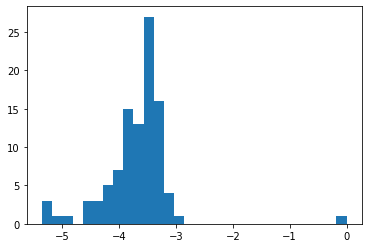

In [53]:
# вычисляем в лоб
eigvals, eigvecs = scipy.linalg.eig(A)
eigvals, eigvecs = np.real(eigvals), np.real(eigvecs)

# находим минимально собственное число
i = np.argmin(eigvals) 
eigval = eigvals[i]    # минимальное собственное число
eigvec = eigvecs[:, i] # сответствующий собственный вектор

# вывод
print("мин. собств. число: {:.2e}".format(eigval))
print("собственный вектор:", eigvec)

plt.hist(np.log10(np.abs(eigvec)), bins=30)
plt.show()

## Задача 4  Возмущение корреляционной матрицы.

Управляющий активами Neurozhaika Capital Management noлучил от своих аналитиков корреляционную матрицу трёх фондовых индексов,

$$
\mathbf{C}_0=\left(\begin{array}{ccc}
1 & 0.9 & 0.7 \\
0.9 & 1 & 0.4 \\
0.7 & 0.4 & 1
\end{array}\right)
$$

Коэффициент корреляции $0.4$ кажется ему завышенным, и он хочет поиграть с этой величиной, промоделировав гипотетический портфель, заменив $0.4$ на $0.3$. Найдите собственнные значения исходной ${\mathbf{C}}_{0} $ и возмущённой $\overline{\mathbf{C}}_{0} $ матриц. Несмотря на относительно малое возмущение и разумный вид возмущённой матрицы какие-то из собственных значений станут отрицательными, и матрица $\overline{\mathbf{C}}_{0}$ не будет положительно определенной, что неприемлемо. Рассмотрите следующий "спектральный" рецепт восстановления свойств корреляционной матрицы:


- Посчитать все собственные значения $\lambda_{i} $  и собственные векторы возмущённой матрицы. Ввести новые собственные значения по правилу $\lambda_{i}^{\prime} = \lambda_{i}$, если $\lambda_{i} \geq 0$, иначе $\lambda_{i}^{\prime}=0$
- Умножить собственные векторы на модифицированные собственные значения $\lambda_{i}^{\prime}$ , и использовать их в качестве столбцов новой матрицы $\mathbf{B}^{\prime}$ .
- Отнормировать строки матрицы $\mathbf{B}^{\prime}$ (векторы) на единичную длину, получив тем самым новую матрицу $\mathbf{B}$.
- Построить новую возмущённую корреляционную матрицу по правилу $\overline{\mathbf{C}}_{1}=\mathbf{B B}^{T}$.

Полученная таким образом матрица $\overline{\mathbf{C}}_{1}$ будет положительно определенной с единицами на главной диагонали, то есть отвечать формальным требованиям, предъявляемым к корреляционной матрице. Найти численно матрицу $\overline{\mathbf{C}}_{1}$.

In [117]:
C0     = np.array([[1.0, 0.9, 0.7],
                   [0.9, 1.0, 0.4],
                   [0.7, 0.4, 1.0]])
C0_bar = np.array([[1.0, 0.9, 0.7],
                   [0.9, 1.0, 0.3],
                   [0.7, 0.3, 1.0]])

# находим собственные числа и вектора для C0 и C0_bar
eigvals_C0, eigvecs_C0 = scipy.linalg.eig(C0)
eigvals_C0_bar, eigvecs_C0_bar = scipy.linalg.eig(C0_bar)

eigvals_C0, eigvecs_C0 = np.real(eigvals_C0), np.real(eigvecs_C0)
eigvals_C0_bar, eigvecs_C0_bar = np.real(eigvals_C0_bar), np.real(eigvecs_C0_bar)

print("собственные числа C0:    ", eigvals_C0)
print("собственные числа C0_bar:", eigvals_C0_bar)

собственные числа C0:     [2.35363603 0.03034736 0.6160166 ]
собственные числа C0_bar: [ 2.29672779 -0.00735244  0.71062465]


In [118]:
# собственные вектора C0_bar
eigvecs_C0_bar

array([[ 0.65991684,  0.74767038, -0.0741536 ],
       [ 0.57099598, -0.5632171 , -0.5972856 ],
       [ 0.48833733, -0.35181742,  0.79859323]])

In [120]:
# обрабатываем отрицательные собственные числа
f = lambda x: x if x > 0 else 0
eigvals_C0_bar_ = np.array(list(map(f, eigvals_C0_bar)))

# строим матрицу B
B = eigvecs_C0_bar * eigvals_C0_bar_
B = (B.T / np.sqrt(np.sum(B**2, axis=1))).T
print("тест нормировки:", np.sum(B**2, axis=1))
print("B:\n", B)

тест нормировки: [1. 1. 1.]
B:
 [[ 0.99939616  0.         -0.03474653]
 [ 0.95141006 -0.         -0.30792679]
 [ 0.89228137 -0.          0.45147974]]


In [121]:
# находим C1_bar
C1_bar = B @ B.T
C1_bar # численно нашли C1

array([[1.        , 0.96153494, 0.87605522],
       [0.96153494, 1.        , 0.70990276],
       [0.87605522, 0.70990276, 1.        ]])

## Задача 5  Вunch-Nielsen-Sorensen formula.

Решите задачу 3 для случая $n=10^{4}$. Для этого используйте  Вunch-Nielsen-Sorensen formula.

Let $\lambda_{i}$ denote the eigenvalues of $A$ and $\tilde{\lambda}_{i}$ denote the eigenvalues of the updated matrix $\tilde{A}=A+v v^{T} .$ In the special case when $A$ is diagonal, the eigenvectors $\tilde{q}_{i}$ of $\tilde{A}$ can be written

$$
\left(\tilde{q}_{i}\right)_{k}=\frac{N_{i} v_{k}}{\lambda_{k}-\tilde{\lambda}_{i}}
$$

where $N_{i}$ is a number that makes the vector $\tilde{q}_{i}$ normalized. 

In [128]:
# генерация матрицы A
n = 10000
D = np.matrix(np.diag(np.random.normal(0, 1, n)))
u = np.matrix(np.random.normal(0, 1, n)).T
A = D + u @ u.T / (u.T @ u)
A = np.array(A)
A

array([[-2.90833123e-01, -7.52370929e-06, -4.40088189e-06, ...,
        -1.73534913e-06,  5.35923651e-06,  3.92145681e-05],
       [-7.52370929e-06, -4.73616260e-01,  4.95520243e-06, ...,
         1.95392797e-06, -6.03426822e-06, -4.41539054e-05],
       [-4.40088189e-06,  4.95520243e-06, -5.78740885e-01, ...,
         1.14292112e-06, -3.52965548e-06, -2.58271705e-05],
       ...,
       [-1.73534913e-06,  1.95392797e-06,  1.14292112e-06, ...,
         3.76341253e-01, -1.39180845e-06, -1.01841311e-05],
       [ 5.35923651e-06, -6.03426822e-06, -3.52965548e-06, ...,
        -1.39180845e-06,  1.72672075e+00,  3.14514042e-05],
       [ 3.92145681e-05, -4.41539054e-05, -2.58271705e-05, ...,
        -1.01841311e-05,  3.14514042e-05, -1.28379877e+00]])

### Решение в лоб

Ну, $10^4$ это всё ещё немного и снова можно в лоб :)

In [129]:
eigvals = np.linalg.eigvalsh(A)

In [178]:
i = np.argmin(eigvals)
eigval_i = eigvals[i]
eigval_i # найденное минимальное собственное число

-4.261454575535717

За 2 минуты посчитал, ну и хорошо. Теперь воспользуемся формулой.

In [179]:
eigvals0 = np.diag(D) # собственные числа матрицы D

v1 = np.array(u).reshape(n) / np.float(np.sqrt(u.T @ u)) # нормируем, чтобы соответствовать формуле
v2 = eigvals0 - eigval_i

q = np.divide(v1, v2)
q # найденный собственный вектор

array([ 0.00065102, -0.0007684 , -0.00046229, ..., -0.00014475,
        0.00034622,  0.00509508])

In [169]:
# проверяем, что нашли собтвенный вектор
np.linalg.norm(A @ q / eigval_i - q)

4.780588772188016e-11

### Решение не в лоб

In [172]:
import scipy
import scipy.optimize

In [182]:
def fun(eigval_i):
    v1 = np.array(u).reshape(n) / np.float(np.sqrt(u.T @ u)) # нормируем, чтобы соответствовать формуле
    v2 = eigvals0 - eigval_i
    q = np.divide(v1, v2+1e-17)
    return np.linalg.norm(A @ q / (eigval_i+1e-17)- q) # + ...

In [183]:
# res = scipy.optimize.minimize_scalar(fun)
# answer = float(res.x)

In [186]:
# нет, так не успел :(